# <p style="text-align: center; font-size: 3rem"> <b> Titanic: Machine Learning from Disaster </b> </p>

<div style="text-align:center;">
  <img src="https://www.thetimes.co.uk/imageserver/image/%2Fmethode%2Ftimes%2Fprod%2Fweb%2Fbin%2Ff3fe3e9a-3bb2-11ea-9c52-a30e6a70847e.jpg?crop=6542%2C3680%2C16%2C412&resize=1024"/>
</div>


## Table of Contents

- [1. Introduction](#1)
- [2. Loading the Data](#2)
- [3. Basic Information](#3)
- [4. Exploratory Data Analysis (EDA)](#4)

# 1. Introduction <a class="anchor" id="1"></a>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some
element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we are asked to complete the analysis of `What sorts of people were more likely to survive?`. In particular, we are asked to apply the tools of machine learning to predict which passengers survived the tragedy.


# 2. Loading the Data <a class="anchor" id="2"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
# train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S


# 3. Basic information <a class="anchor" id="3"></a>

### How many rows and columns are there in the train and test data?

In [3]:
print(f'Train has {train_df.shape[0]} rows and {train_df.shape[1]} columns')
print(f'Test has {test_df.shape[0]} rows and {test_df.shape[1]} columns')

Train has 891 rows and 12 columns
Test has 418 rows and 11 columns


### Is there any duplicate rows in the train and test data?

In [4]:
print(f'Train has {train_df.duplicated().sum()} duplicated rows')
print(f'Test has {test_df.duplicated().sum()} duplicated rows')

Train has 0 duplicated rows
Test has 0 duplicated rows


## Meanings of each rows

Each row of the data represents a passenger on the Titanic, and some information about them.

## Meaning of each columns

|Column Name|Meaning|
|:---|:---|
|PassengerId|An unique index for passenger rows|
|Survived|If the passenger survived or not (1 - yes, 0 - no)|
|Pclass|Ticket class (1 - 1st, 2 - 2nd, 3 - 3rd)|
|Name|Name of the passenger|
|Sex|Sex of passenger|
|Age|Age of passenger|
|SibSp|Number of siblings/spouses aboard|
|Parch|Number of parents/children aboard|
|Ticket|Ticket number of passenger|
|Fare|Indicating the fare paid|
|Cabin|The cabin number of passenger|
|Embarked|The port in which a passenger has embarked. (C - Cherbourg, S - Southampton, Q = Queenstown)|


***PassengerId***

The first column is the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the
information we should care about. We can drop this column or make it the index for this dataset.

In [5]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data types of each columns

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`
- Numerical: `Age`, `Fare`
- Mix type: `Ticket`, `Cabin`
- Contain errors or typos: `Name`
- Missing values: `Age`, `Cabin`, `Embarked`
- Data type: String, Integer, Float

In [7]:
converted_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
def convert_features(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
    return df

train_df = convert_features(train_df,converted_features)
test_df = convert_features(test_df,converted_features[:-1])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Distribution of numerical features

In [9]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of categorical features

In [10]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 4. Exploratory Data Analysis (EDA) <a class="anchor" id="4"></a>

### 4.1 Correlating categorical features <a class = "anchor" id="4.1"></a>
- Catetorical: `Sex`, `Embarked`, `Pclass`, `SibSp`, `Parch`, `Survived`

#### Target variable: `Survived`

In [11]:
survival_rate = train_df['Survived'].value_counts().to_frame()
survival_rate['Rate'] = round(train_df['Survived'].value_counts(normalize=True)*100,2)
survival_rate

,count,Rate
Survived,,
0,549,61.62
1,342,38.38


Only 38.4% of the passengers survived the disaster. So the training data suffers from data imbalance but it not too severe which is why I will not consider techniques like sampling to tackle this problem.

#### `Sex`

In [12]:
sex_rate = train_df['Sex'].value_counts().to_frame()
sex_rate['Rate'] = round(train_df['Sex'].value_counts(normalize=True)*100,2)
sex_rate

,count,Rate
Sex,,
male,577,64.76
female,314,35.24


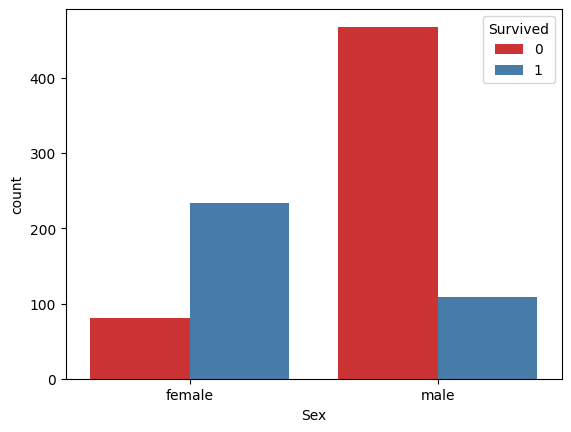

In [13]:
sns.countplot(data=train_df,x='Sex', hue='Survived', palette='Set1');

- Remaining Categorical feature columns

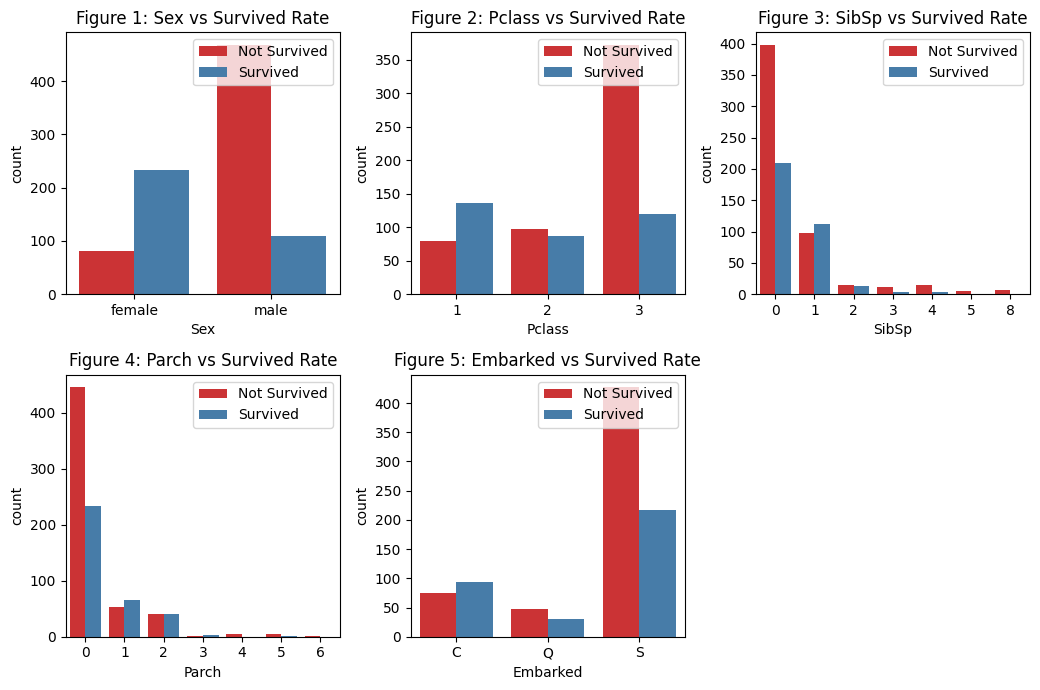

In [14]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c       
        if i < len(cols):
            ax = axs[r][c]
            sns.countplot(train_df, x=cols[i],hue='Survived', ax=ax, palette='Set1')
            ax.set_title(f'Figure {i+1}: {cols[i]} vs Survived Rate')
            ax.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

axs.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

Observation:

- **Survival Rate**:
    - Fig 1: Female survival rate > male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 SibSp are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 Parch are mostly not survived

## 4.2 EDA for Numerical Features <a class="anchor" id="4.2"></a>

- Numerical Features: `Age`, `Fare`

#### `Age`

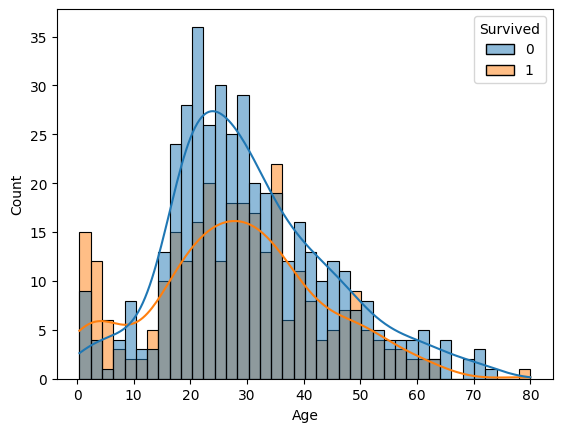

In [15]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins = 40, kde=True);

- Majority passengers were in the age range of 18 - 40
- Children below 10 years of age had more chance to survive than any other age group

#### `Fare`

In [16]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

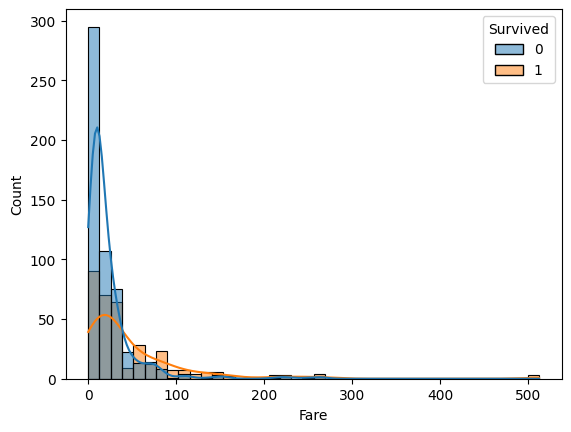

In [17]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins = 40, kde=True);

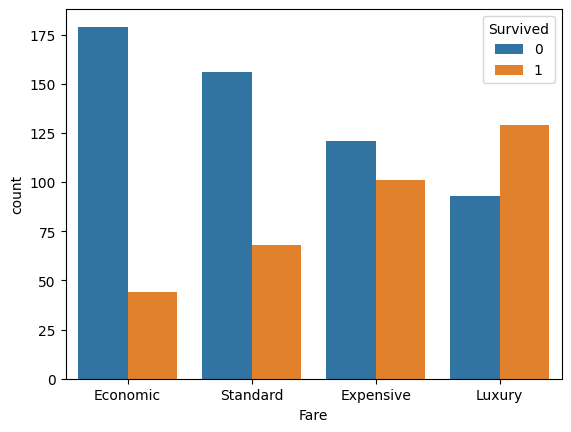

In [18]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartitle_data = pd.qcut(train_df['Fare'], q=4, labels=fare_categories)

sns.countplot(data=train_df, x=quartitle_data, hue='Survived');

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range (`0-100$`)
    - The distribution is skewed towards the right with `75%` of the fare paid under `$31` and a maximum fare of `$512`
- Quartile plot
    - Passenger with Luxury & Expensive Fare will have a higher chance of survival
    - The more the fare, the higher the chance of survival as shown in the quartile plot

# 5. Feature Engineering <a class="anchor" id="5"></a>

## Name

In [19]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- Most of the names have a title associated with them. We can extract the title from each name and then analyze and categorize it.

In [20]:
def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(extract_title)

In [21]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [22]:
test_df['Title'] = test_df['Name'].apply(extract_title)
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

- 4 titles: `Mr`, `Miss`, `Mrs`, `Master` are the majority so we will assign the remaining titles to 1 title as `Others`

In [23]:
def group_titles(col):
    title = col['Title']
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if col['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return 'Others'
    
train_df['Title'] = train_df.apply(group_titles, axis=1)
test_df['Title'] = test_df.apply(group_titles, axis=1)

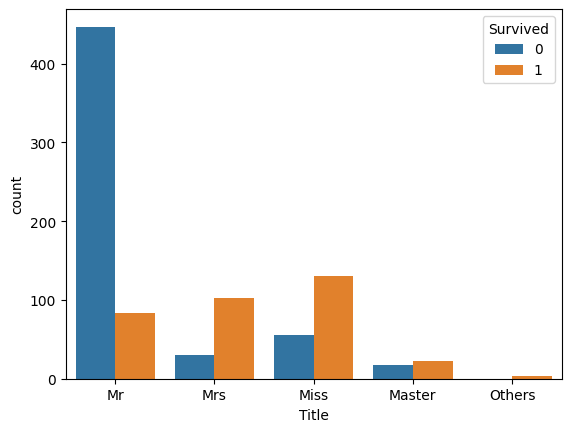

In [24]:
sns.countplot(data=train_df, x='Title', hue='Survived');

## Family
- `SibSP`, `Parch`

In [25]:
train_df['Family_Size'] = train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1
test_df['Family_Size'] = test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1

In [26]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])

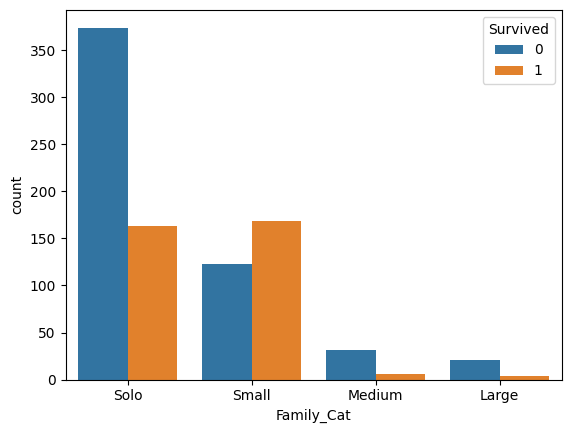

In [27]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

# 6. Data Wrangling <a class="anchor" id="6"></a>

In [28]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [29]:
def display_missing(df, cols):
    for col in cols:
        missing_count = df[col].isnull().sum()
        if missing_count != 0:
            print(f'{col} has {missing_count} missing values and {round(missing_count*100/df.shape[0],2)}%')

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 177 missing values and 19.87%
Embarked has 2 missing values and 0.22%
Age has 86 missing values and 20.57%
Fare has 1 missing values and 0.24%


### Fill missing values

#### `Age`

- Fill missing values with the median age of similar rows according to `Pclass` and `Sex`

In [30]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].median().to_frame()
age_by_sex_pclass

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [31]:
# Fill missing values in Age with median of Sex and Pclass groups

# Fill missing values in 'Age' with the median of 'Sex' and 'Pclass' groups
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level=['Sex', 'Pclass'], drop=True)
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level=['Sex', 'Pclass'], drop=True)

In [32]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 2 missing values and 0.22%
Fare has 1 missing values and 0.24%


In [33]:
X = train_df[feature_cols]
y = train_df['Survived']

X_test = test_df[feature_cols]

In [34]:
# preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [36]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [37]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

# 7. Model Training <a class="anchor" id="7"></a>

We will start by training a few classification models and then build a baseline model. Then we will evaluate the performance of our baseline models and choose the best performing model for further tuning.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Validation has {X_val.shape[0]} rows and {X_val.shape[1]} columns')

Train has 712 rows and 19 columns
Validation has 179 rows and 19 columns


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42,solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)
print(f'Score on validation set: {log_reg.score(X_val, y_val)}')
print(f'Precision Score: {precision_score(y_val, y_pred)}')
print(f'Recall Score: {recall_score(y_val, y_pred)}')
print(f'Classification Report: \n{classification_report(y_val, y_pred)}')

Score on validation set: 0.8212290502793296
Precision Score: 0.7916666666666666
Recall Score: 0.7702702702702703
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Logistic Regression with polynomial features

In [40]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [41]:
poly_log_reg = LogisticRegression(random_state=42,solver='liblinear', max_iter=1000)
poly_log_reg.fit(X_train_poly, y_train)

y_pred = poly_log_reg.predict(X_val_poly)
print(f'Score on validation set: {poly_log_reg.score(X_val_poly, y_val)}')
print(f'Precision Score: {precision_score(y_val, y_pred)}')
print(f'Recall Score: {recall_score(y_val, y_pred)}')
print(f'Classification Report: \n{classification_report(y_val, y_pred)}')

Score on validation set: 0.8435754189944135
Precision Score: 0.8484848484848485
Recall Score: 0.7567567567567568
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_val)
print(f'Score on validation set: {decision_tree.score(X_val, y_val)}')
print(f'Precision Score: {precision_score(y_val, y_pred)}')
print(f'Recall Score: {recall_score(y_val, y_pred)}')
print(f'Classification Report: \n{classification_report(y_val, y_pred)}')

Score on validation set: 0.8100558659217877
Precision Score: 0.7702702702702703
Recall Score: 0.7702702702702703
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Baseline Model Comparision <a class="anchor" id="7.2"></a>

In [44]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

seed = 42
models = [
    LinearSVC(random_state=seed, max_iter=12000, dual=False),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski' ,p=2),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss'),
    LogisticRegression(random_state=seed,solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed)
]

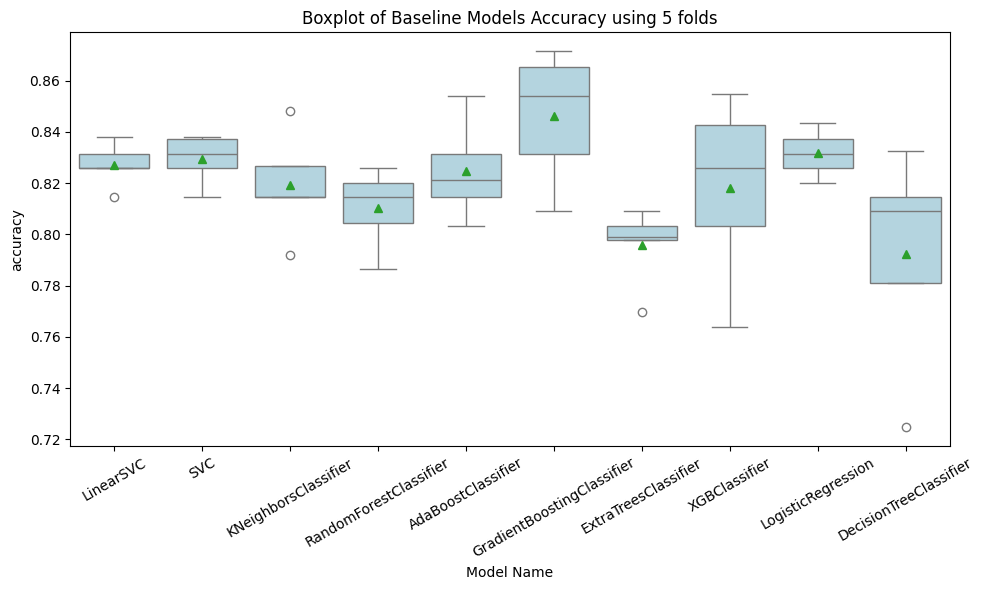

,Mean,Standard Deviation
model_name,,
GradientBoostingClassifier,0.846212,0.025797
LogisticRegression,0.831636,0.009165
SVC,0.829396,0.009598
LinearSVC,0.827148,0.008614
AdaBoostClassifier,0.824920,0.019163
KNeighborsClassifier,0.819296,0.020496
XGBClassifier,0.818141,0.035871
RandomForestClassifier,0.810332,0.015478
ExtraTreesClassifier,0.795732,0.015229


In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def generate_baseline_results(models, X, y, metric, cv=5, plot_results =False):
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metric, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
        
    cv_results = pd.DataFrame(entries, columns=['model_name', 'fold_idx', metric])
    
    if plot_results:
        plt.figure(figsize=(10,6))
        sns.boxplot(x='model_name', y=metric, data=cv_results,color='lightblue', showmeans=True)
        plt.title(f'Boxplot of Baseline Models Accuracy using {cv} folds')
        plt.xticks(rotation=30)
        plt.xlabel('Model Name')
        plt.tight_layout()
        plt.show()
    
    # Summary of baseline results
    mean = cv_results.groupby('model_name')[metric].mean()
    std = cv_results.groupby('model_name')[metric].std()
    
    summary = pd.concat([mean, std], axis=1, ignore_index=True)
    summary.columns = ['Mean', 'Standard Deviation']
    
    return summary.sort_values(by='Mean', ascending=False)

generate_baseline_results(models, X, y, 'accuracy', cv=5, plot_results=True)

The best performing model is Gradient Boosting Classifier. So we will use it to find the best hyperparameters using Bayesian Search CV.

In [69]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define search space for hyperparameters for GradientBoostingClassifier
np.int = int
search_spaces = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical([None, 'sqrt', 'log2']),
    'learning_rate': Real(0.001, 0.1, 'log-uniform'),
}

model = GradientBoostingClassifier(random_state=seed)

opt = BayesSearchCV(model, search_spaces, n_iter=32, cv=5, scoring='accuracy', random_state=seed, n_jobs=-1)

opt.fit(X, y)

for param, value in opt.best_params_.items():
    print(f'{param}: {value}')
    
print(f'Best Accuracy: {opt.best_score_}')

learning_rate: 0.02718418505946554
max_depth: 10
max_features: None
min_samples_leaf: 10
min_samples_split: 2
n_estimators: 100
Best Accuracy: 0.8507312786391313


In [70]:
# Submission
y_pred = opt.predict(X_test)
submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)